# Notebook te execute tests

In [2]:
%load_ext autoreload
%autoreload 2

# The import statements
from test_scripts import *
from experimentRunner import ExperimentRunner
from algorithms import *
from pathlib import Path
from metric_learn import *
from operator import itemgetter

def ignore_warnings():
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    warnings.simplefilter(action='ignore', category=Warning)

ignore_warnings()

In [3]:
# The setup for the time management
import datetime
currentDate = datetime.date.today()
currentMonthName = currentDate.strftime("%B")
currentDay = currentDate.strftime("%d-%m")

from datetime import datetime

start_year = '2022/09/26'

# convert string to date object
d1 = datetime.strptime(start_year, "%Y/%m/%d")
d2 = datetime.strptime(str(currentDate), "%Y-%m-%d")

# difference between dates in timedelta
delta = d2 - d1
#print(f'Difference is {delta.days} days')

nbWeek = int(delta.days/7) + 1

import os
from pathlib import Path
path = Path('experimenten/' + currentMonthName + '/week' + str(nbWeek)).absolute()
CHECK_FOLDER = os.path.isdir(path)
if not CHECK_FOLDER:
    os.makedirs(path)
    print("created folder : ", path)

else:
    print(path, "folder already exists.")

e:\Projecten\Unif_proj\ThesisCode\Testing\experimenten\November\week7 folder already exists.


In [4]:
# Dictionary with all the algorithms, datasets and preprocessing 

datasets = dict()
path_data = Path('datasets/cobras-paper/').absolute()
dir_list = os.listdir(path_data)
for i in range(len(dir_list)):
    datasets[i + 1] = dir_list[i][:len(dir_list[i]) - 5]
print(datasets)

algos = {
    0: Cobras(),
    1: SemiSupervised(),
    2: Supervised(),
    3: Preprocessed(),
    4: PortionPreprocessed()
}

ml_ss = {
    0: NCA(max_iter=100) # dees nog verder uitbereiden
}

ml_semi = {
    0: ITML()
}

{1: 'breast-cancer-wisconsin', 2: 'column_2C', 3: 'dermatology', 4: 'ecoli', 5: 'faces_expression_imagenet', 6: 'faces_eyes_imagenet', 7: 'faces_identity_imagenet', 8: 'faces_pose_imagenet', 9: 'glass', 10: 'hepatitis', 11: 'iris', 12: 'newsgroups_diff3', 13: 'newsgroups_sim3', 14: 'optdigits389_full', 15: 'parkinsons', 16: 'segmentation', 17: 'segmentation_training_only', 18: 'sonar', 19: 'spambase', 20: 'yeast'}


In [22]:
# Foldcreator

fold = 1
newFold = False

if newFold:
    print("Creating new fold to use in the experiments")
    for key, value in datasets.items():
        k = ExperimentRunner("Fold creator " + value , path, currentDay)
        fold = k.createFold(10, value)

## Effect of first training a metric on the trainingset or full set

In [23]:
# %%capture
k = ExperimentRunner("Effect_of_preprocessing_with_metric_learning", path, currentDay, saveResults= True) # nog ARI berekenen
k.loadDataSets([]) # list(itemgetter(11, 10)(datasets)) to get specific datasets
k.addAlgo(list(itemgetter(0,3, 4)(algos)))
k.run(runsPQ= 10, maxQ=200, crossFold=fold, save=True)
full = k.makePlot(maxQ = 200, sortByAlgo=True, sortByDataset=False, seperate=False)
# seperate = k.makePlot(maxQ = 100, sortByAlgo=True, sortByDataset=False, seperate=True)
k.makeZip()

KeyboardInterrupt: 

## Baseline

[ 18.6   44.5   44.65  42.3   42.2   59.1   58.55  62.85  63.5   73.8 
  66.65  69.2   79.6   78.3   83.2   72.15  76.65  66.6   74.55  79.9
  72.4   81.65  87.8   85.75  87.85  83.65  82.55  84.15  85.6   90.85
  89.65  91.1   99.4   87.9   88.85  95.6   86.3   77.3   89.25  96.85
  98.95  90.6   71.6   90.9   96.55  99.9   82.1   92.4   95.4  100.95
  93.15 101.3   88.9   98.7  103.3  103.65 105.85 104.85 111.65 106.65
  93.65 111.25 111.75 110.15 111.8  119.95 112.9  107.8  111.4  111.25
 120.9  116.6  112.75 119.8  122.2  105.95 112.65 109.7  121.   117.25
 120.75 107.   119.05 104.75 124.4  118.55 124.1  118.8  109.3  122.2
 126.2  115.7  118.8  126.45 113.8  121.3  130.7  123.05  97.6  117.9
 112.65 118.35 117.   118.8  127.3  105.05 103.3  101.05 108.4  115.85
 110.85 123.15 109.45 113.6  120.25 118.75 117.2  106.5  113.35 111.25
 116.4  113.55 110.25 109.55 103.25 112.7  117.55 107.3  113.    96.9
 106.35 110.9  109.7  106.55 107.4  110.35 107.15 105.95 111.55 107.95
 117.55 11

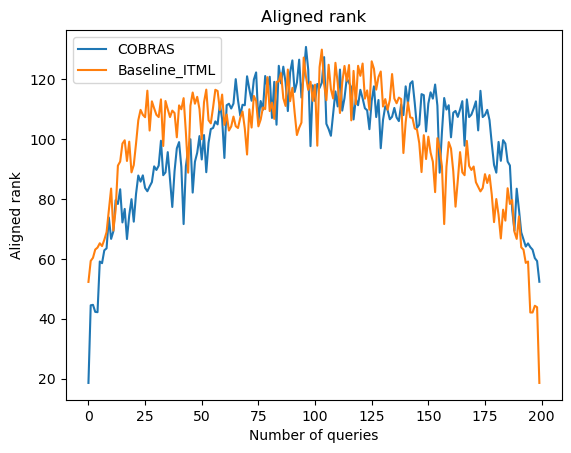

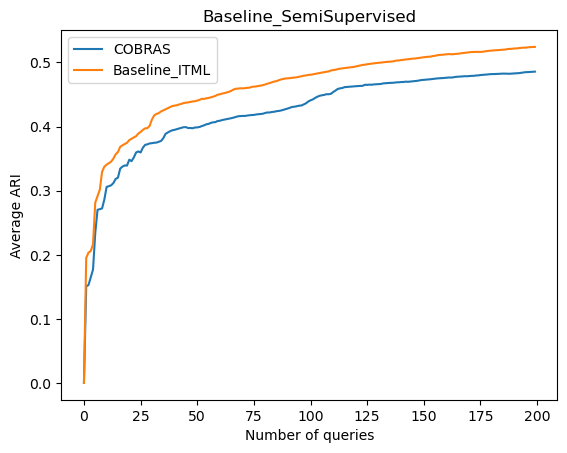

In [21]:
# %%capture
k = ExperimentRunner("Baseline_SemiSupervised", path, currentDay, saveResults= True)
k.loadDataSets([]) # list(itemgetter(11, 10)(datasets)) to get specific datasets
k.addAlgo([Cobras(), BaselineSemiSupervised()])
k.run(runsPQ= 10, maxQ=200, crossFold=fold, save=True)
full = k.makePlot(maxQ = 200, sortByAlgo=True, sortByDataset=False, seperate=False, aligned=True)
# seperate = k.makePlot(maxQ = 200, sortByAlgo=True, sortByDataset=False, seperate=True)
k.makeZip()

## Variance test

In [9]:
# variance test -> werkt gewoon met gemiddeldes I guess en geen crossfold
